In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from random import*
from scipy.stats import entropy

# Problem 1, questions a-b)

In [2]:
def myentropy0(plist): #this version has an issue when a probability is 0
    result=0;
    for i in range(np.size(plist)):
        result=result-plist[i]*np.log2(plist[i])
    return result

In [3]:
myentropy0([9/10, 1/10])

0.4689955935892812

In [4]:
myentropy0([1,0])

<ipython-input-2-956a15f87483>:4: RuntimeWarning: divide by zero encountered in log2
  result=result-plist[i]*np.log2(plist[i])
<ipython-input-2-956a15f87483>:4: RuntimeWarning: invalid value encountered in double_scalars
  result=result-plist[i]*np.log2(plist[i])


nan

In [5]:
def myentropy(plist): #this version has no issue when a probability is 0
    result=0;
    for i in range(np.size(plist)):
        if plist[i]>0:
            result=result-plist[i]*np.log2(plist[i])
    return result

In [6]:
myentropy([9/10, 1/10])

0.4689955935892812

In [7]:
myentropy([1,0])

0.0

# Problem 1, question c)

In [8]:
entropy([9/10, 1/10], base=2)

0.46899559358928117

In [9]:
entropy([1,0], base=2)

0.0

In [10]:
pvals=np.linspace(0, 1, 20)
entropies=np.zeros(np.size(pvals))
for i in range(np.size(pvals)):
    entropies[i]=entropy([pvals[i], 1-pvals[i]], base=2)

# Problem 1, question d)

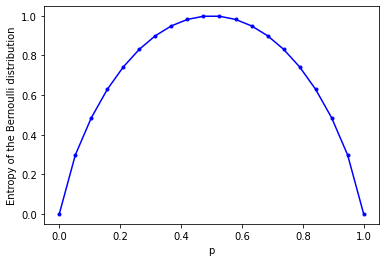

In [11]:
plt.plot(pvals, entropies,'b.-')
ax = plt.gca()
ax.set_xlabel("p")
ax.set_ylabel("Entropy of the Bernoulli distribution")
plt.show()

# Problem 1, question e)

In [12]:
from scipy.stats import binom

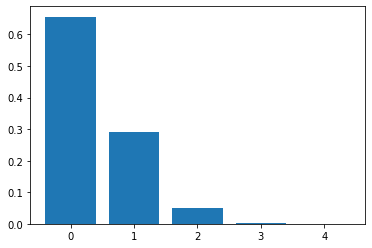

In [13]:
plt.bar(range(5),binom.pmf(range(5),4,0.1),label='Data')
plt.show()

In [14]:
entropy(binom.pmf(range(5),4,0.1), base=2)

1.1599531968220769

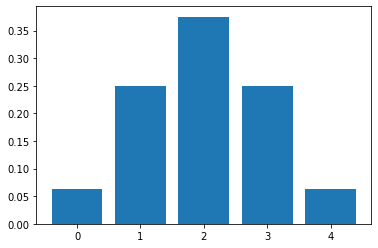

In [15]:
plt.bar(range(5),binom.pmf(range(5),4,0.5),label='Data')
plt.show()

In [16]:
entropy(binom.pmf(range(5),4,0.5), base=2)

2.0306390622295667

# Problem 2, question a)

In [17]:
np.log2(10)

3.321928094887362

# Problem 2, question b)

In [18]:
Nsamples=100
samples=np.zeros(Nsamples)
for i in range(Nsamples):
    samples[i]=randint(0, 9)
hist, bin_edges = np.histogram(samples, bins=np.linspace(-0.5,9.5,11), density=True)
entropy(hist, base=2)

3.2229465470030507

# Problem 2, question c)

In [19]:
Nsamples=100
repl=200
entropies=np.zeros(repl)
for j in range(repl):
    samples=np.zeros(Nsamples)
    for i in range(Nsamples):
        samples[i]=randint(0, 9)
        hist, bin_edges = np.histogram(samples, bins=np.linspace(-0.5,9.5,11), density=True)
    entropies[j]=entropy(hist, base=2)

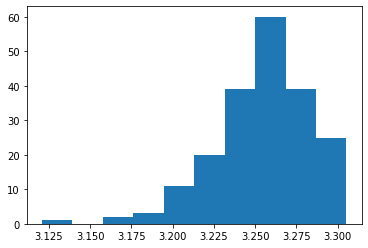

In [20]:
plt.hist(entropies,label='Data')
plt.show()

In [21]:
np.max(entropies)

3.305317063836463

In [22]:
np.mean(entropies)

3.2545908353018826

# Problem 2, question d)

In [23]:
Nsamples=1000
repl=50
entropies=np.zeros(repl)
for j in range(repl):
    samples=np.zeros(Nsamples)
    for i in range(Nsamples):
        samples[i]=randint(0, 9)
        hist, bin_edges = np.histogram(samples, bins=np.linspace(-0.5,9.5,11), density=True)
    entropies[j]=entropy(hist, base=2)

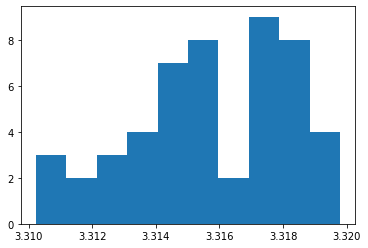

In [24]:
plt.hist(entropies,label='Data')
plt.show()

In [25]:
np.max(entropies)

3.319795766674872

In [26]:
np.mean(entropies)

3.315764888298676

# Problem 3, question c)

In [27]:
import pandas as pd
data_vis=pd.read_csv('Data7.csv', sep='\t',header=None)

In [28]:
data_vis

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,Population,Barcodes,EvolutionFitness(percent),EvolutionFitnessConfidenceInterval(percent),BarcodingFitness(per barcoding procedure),BarcodingFitnessConfidenceInterval(per barcodi...,Frequency(t=1.0),Frequency(t=1.10),Frequency(t=1.20),Frequency(t=1.30),...,Frequency(t=10.30),Frequency(t=10.40),Frequency(t=10.50),Frequency(t=10.60),Frequency(t=10.70),Frequency(t=10.80),Frequency(t=10.90),Frequency(t=10.100),Frequency(extra1),Frequency(extra2)
1,YPD,ancestor,0.0,-0.0500000000,0.0000000000,0.0,-0.0350000000,0.0300000000,0.9996687868,0.9996741128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YPD,CCTGGAGCAGTCTAAT,0.75,0.5000000000,0.9500000000,0.23,-0.0350000000,0.4600000000,0.0000398595,0.0000331922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YPD,ACGAGGCGTGTAATCA,-0.10000000000000009,-0.3000000000,0.0500000000,1.13,0.9600000000,1.2900000000,0.0000351143,0.0000694019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YPD,GTGCCTAGACCAACTT,0.0,-0.2000000000,0.2000000000,1.095,0.9000000000,1.2700000000,0.0001746224,0.0001468504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,YPA,CGCGGTGGAACGGAGG_CGCAACATGTAAACTT_AACGATGATACG...,6.550000000000001,5.2000000000,7.8500000000,-0.14999999999999947,-2.6000000000,0.9200000000,0.0000000000,0.0000000000,...,0.0000652686,0.0000475622,0.0000506144,0.0000213532,0.0000085814,0.0000518634,0.0000226326,0.0000240688,0.0000220503,0.0000199094
195,YPA,TCTAGCGCGGCCGAAT_CTATGAGGTAGAAACA_CCGGAAAGAGTA...,7.3,6.4000000000,8.2000000000,-0.8049999999999997,-2.8100000000,0.1650000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
196,YPA,TCCATTGAGAACAACT_TGCACACCCATGAGTA_GGTTGCAAGCAT...,7.5,6.7000000000,8.2500000000,4.76,4.0500000000,5.0000000000,0.0000000000,0.0000000000,...,0.0008212964,0.0009469206,0.0011247645,0.0009423863,0.0010211919,0.0008755766,0.0010207315,0.0010861030,0.0011119651,0.0008361953
197,YPA,TCCATTGAGAACAACT_TGCACACCCATGAGTA_GGTTGCAAGCAT...,8.65,7.8500000000,9.4000000000,3.07,2.0450000000,3.7450000000,0.0000000000,0.0000000000,...,0.0008158574,0.0007372144,0.0007212552,0.0007473607,0.0007465857,0.0007779513,0.0007423502,0.0008273638,0.0008536616,0.0008361953


In [29]:
my_data = np.genfromtxt('Data7.csv', delimiter='\t')

In [30]:
my_data

array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan, 0.0000000e+00, ...,           nan,
                  nan,           nan],
       [          nan,           nan, 7.5000000e-01, ...,           nan,
                  nan,           nan],
       ...,
       [          nan,           nan, 7.5000000e+00, ..., 1.0861030e-03,
        1.1119651e-03, 8.3619530e-04],
       [          nan,           nan, 8.6500000e+00, ..., 8.2736380e-04,
        8.5366160e-04, 8.3619530e-04],
       [          nan,           nan, 8.4000000e+00, ..., 5.1747840e-04,
        5.2290710e-04, 4.3800710e-04]])

# Problem 3, question d)

In [31]:
np.sum(my_data[1:74,8:107],axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Problem 3, question e)

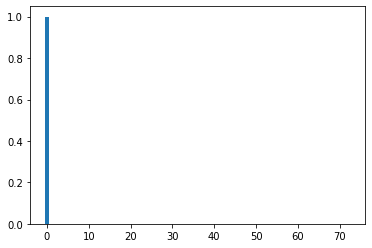

In [32]:
plt.bar(np.arange(73),my_data[1:74,8],label='Data')
plt.show()

In [33]:
entropy(my_data[1:74,8], base=2)

0.00486821844760701

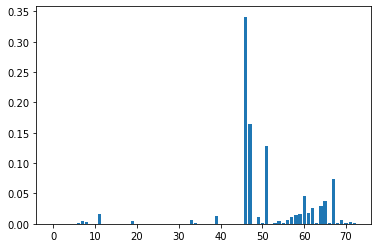

In [34]:
plt.bar(np.arange(73),my_data[1:74,106],label='Data')
plt.show()

In [35]:
entropy(my_data[1:74,106], base=2)

3.3458096203421253

# Problem 3, question f)

In [36]:
results_table=np.zeros(99)
for i in range(8,107):
    results_table[i-8]=entropy(my_data[1:74,i], base=2)

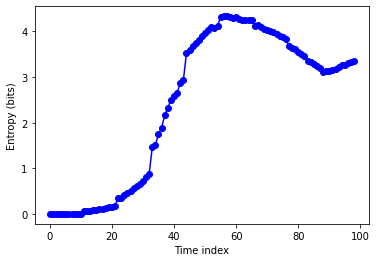

In [37]:
plt.plot(np.arange(99),results_table[:],'bo-')
ax = plt.gca()
ax.set_xlabel("Time index")
ax.set_ylabel("Entropy (bits)")
plt.show()

# Problem 3, question g)

In [38]:
np.sum(my_data[74:199,8:117],axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

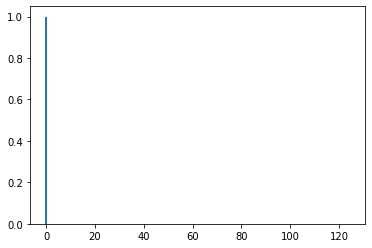

In [39]:
plt.bar(np.arange(125),my_data[74:199,8],label='Data')
plt.show()

In [40]:
entropy(my_data[74:199,8], base=2)

0.01425857901255439

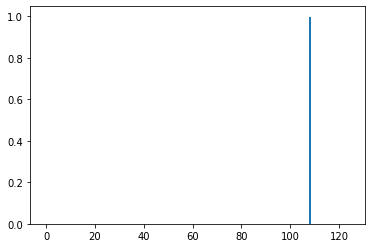

In [41]:
plt.bar(np.arange(125),my_data[74:199,117],label='Data')
plt.show()

In [42]:
entropy(my_data[74:199,117], base=2)

0.02955809598487556

In [43]:
results_table_2=np.zeros(110)
for i in range(8,118):
    results_table_2[i-8]=entropy(my_data[74:199,i], base=2)

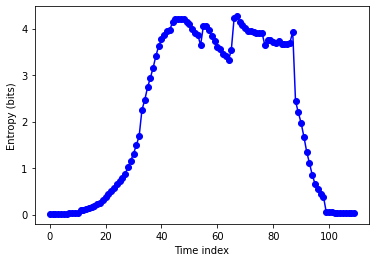

In [44]:
plt.plot(np.arange(110),results_table_2[:],'bo-')
ax = plt.gca()
ax.set_xlabel("Time index")
ax.set_ylabel("Entropy (bits)")
plt.show()